## Adding more regression alogorithms

#### Importing the necessary libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

#### Loading the dataset

In [2]:
data = pd.read_csv('./Salary_dataset.csv', usecols=['YearsExperience','Salary'])
data.head(10)

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0
5,3.0,56643.0
6,3.1,60151.0
7,3.3,54446.0
8,3.3,64446.0
9,3.8,57190.0


In [3]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.413333,76004.000000
std,2.837888,27414.429785
min,1.200000,37732.000000
25%,3.300000,56721.750000
50%,4.800000,65238.000000
75%,7.800000,100545.750000
max,10.600000,122392.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [5]:
data.shape

(30, 2)

In [6]:
data.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [7]:
data.isnull().mean()*100

YearsExperience    0.0
Salary             0.0
dtype: float64

In [8]:
data.duplicated().sum()

0

### Explaratory data analysis

#### Univariate analysis

#### Histogram

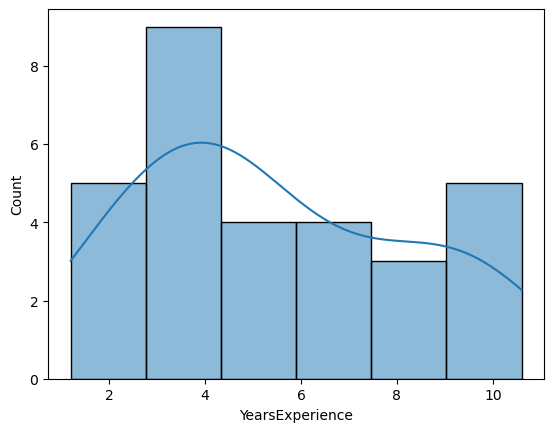

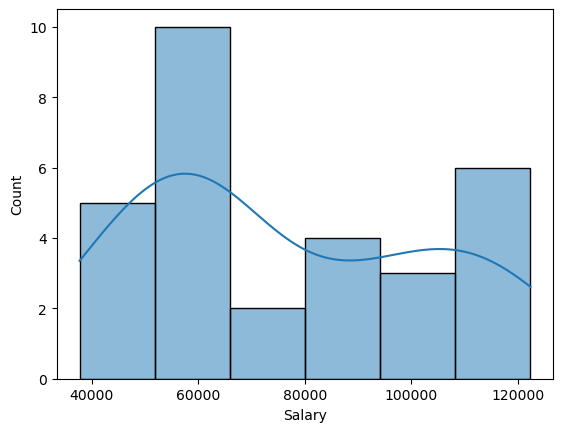

In [9]:
for i in data.columns:
    sns.histplot(x=data[i], kde=True)
    plt.show()

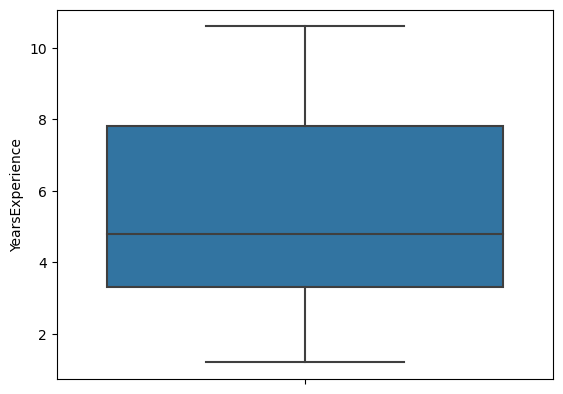

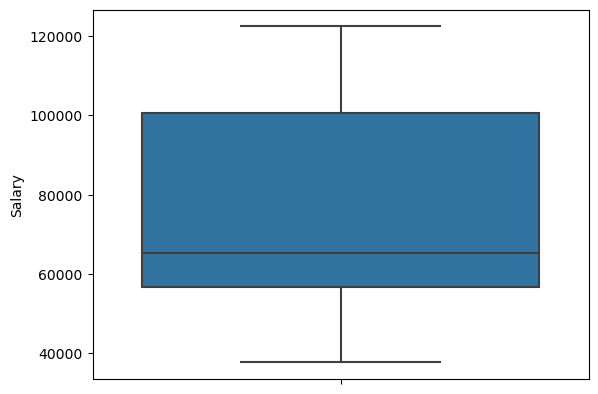

In [10]:
for i in data.columns:
    sns.boxplot(y=data[i])
    plt.show()

#### There are no outliers

#### Multivariate analysis

#### scatter plot

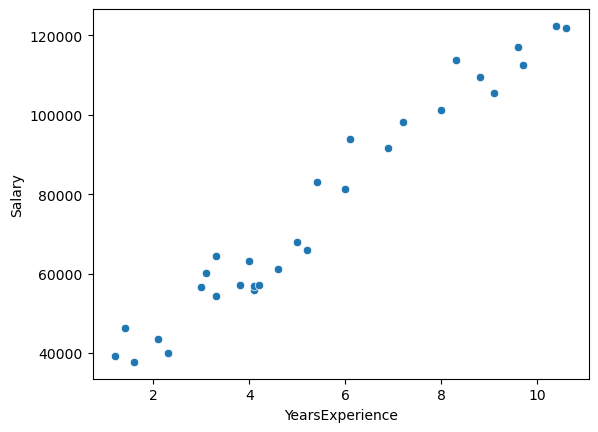

In [11]:
sns.scatterplot(data=data, x='YearsExperience', y='Salary')
plt.show()

#### Heat map

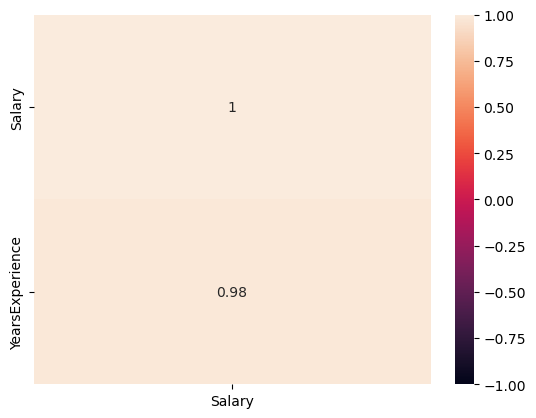

In [12]:
sns.heatmap(data.corr()[['Salary']].sort_values(by='Salary', ascending=False), vmin=-1, vmax=1, annot=True)
plt.show()

#### Selecting features and Targets

In [13]:
x = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

### Feature scaling

#### Initialising Standard Scaler

In [14]:
sc = StandardScaler()

In [15]:
x = sc.fit_transform(x)

#### Splitting the data into training and testing sets

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, shuffle=True)

### Model building

#### Initialising the model

In [17]:
model = LinearRegression()

#### Fitting the model with training data

In [18]:
model.fit(x_train, y_train)

LinearRegression()

#### Predicting using the test data

In [19]:
y_pred = model.predict(x_test)

#### Evaluating the accuracy

In [20]:
r2_score(y_test, y_pred)

0.9024461774180498

#### Testing accuracy

In [21]:
model.score(x_test, y_test)

0.9024461774180498

#### Training accuracy

In [22]:
model.score(x_train, y_train)

0.9645401573418148

#### MAE

In [23]:
mean_absolute_error(y_test, y_pred)

6286.453830757746

#### MSE

In [24]:
mean_squared_error(y_test, y_pred)

49830096.85590834

#### Root Mean Squared Error

In [25]:
np.sqrt(mean_squared_error(y_test,y_pred))

7059.043621901506

#### Creating a dataframe with y_test and y_pred

In [26]:
OUTPUT = pd.DataFrame(zip(y_test, y_pred), columns=['ACTUAL', 'PREDICTION'])

In [27]:
OUTPUT.head()

,ACTUAL,PREDICTION
0,112636.0,115791.210113
1,67939.0,71499.278095
2,113813.0,102597.868661
3,83089.0,75268.804224
4,64446.0,55478.792045


#### Plotting the result

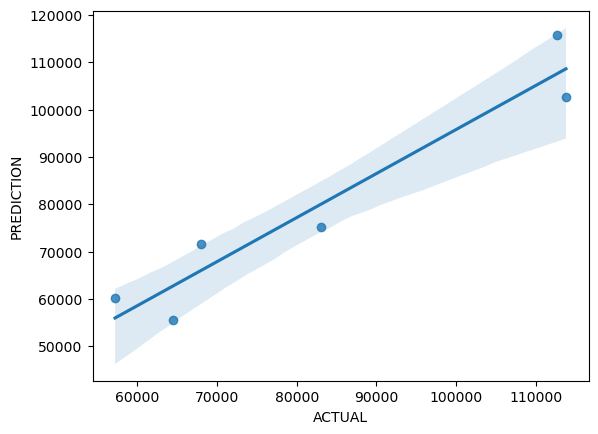

In [28]:
sns.regplot(data=OUTPUT, x='ACTUAL', y='PREDICTION')
plt.show()

#### Ridge regressor

In [29]:
model_ridge = Ridge()

In [30]:
model_ridge.fit(x_train, y_train)

Ridge()

In [31]:
y_pred = model_ridge.predict(x_test)

In [32]:
r2_score(y_test, y_pred)

0.8990753161815598

In [33]:
model_ridge.score(x_test, y_test)

0.8990753161815598

In [34]:
model_ridge.score(x_train, y_train)

0.9631759940633963

In [35]:
mean_squared_error(y_test, y_pred)

51551919.10188977

In [36]:
mean_absolute_error(y_test, y_pred)

6197.852591589629

In [37]:
np.sqrt(mean_squared_error(y_test, y_pred))

7179.966511195562

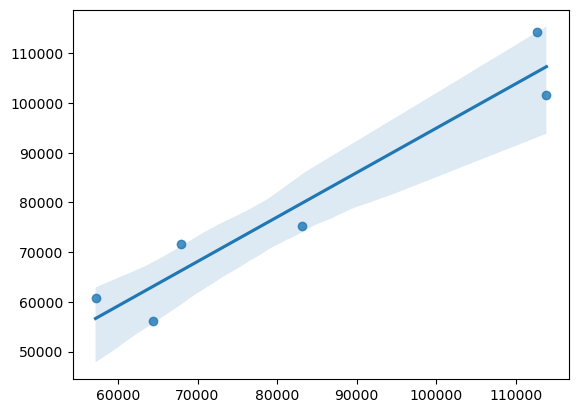

In [38]:
sns.regplot(x=y_test, y=y_pred);